In [1]:
import sys
import SimpleITK as sitk
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline 
import numpy as np
import os
import fnmatch
import shutil
from ipywidgets import interact, fixed
import pandas as pd
import warnings
from skimage import exposure
import _pickle as cPickle

def myshow(image_arr,slice_n):
    plt.imshow(image_arr[slice_n,:,:],cmap='gray')
    plt.show()

In [26]:
'''
Starting Data Augmentation 

We know from the EDA that ~250 images from each modalities had shown no cancer after biopsy

We have ~50 images in each modalities that had shown cancer after biopsy 

So we need to augment these
'''

t2_df = pd.read_csv('./t2_df.csv')
adc_df = pd.read_csv('./adc_df.csv')
bval_df = pd.read_csv('./adc_df.csv')
ktrans_df = pd.read_csv('./ktrans_df.csv')



In [28]:
#reading arrays 
t2_arr = sitk.GetArrayFromImage(sitk.ReadImage('./t2_seq.nii.gz'))
adc_arr = sitk.GetArrayFromImage(sitk.ReadImage('./adc_seq.nii.gz'))
bval_arr = sitk.GetArrayFromImage(sitk.ReadImage('./bval_seq.nii.gz'))
ktrans_arr = sitk.GetArrayFromImage(sitk.ReadImage('./ktrans_seq.nii.gz'))

#function to save the arrays into dataframes
def loop_at_patch(data, array): 
    for i in range(len(data)):
        data.at[i, 'patches'] = array[i]
       

#applying function

loop_at_patch(t2_df, t2_arr)
loop_at_patch(adc_df, adc_arr)
loop_at_patch(bval_df, bval_arr)
loop_at_patch(ktrans_df, ktrans_arr)

In [33]:
#leave only significant columns

def leave_sig(data,columns=['ClinSig', 'patches']):
    data=data.loc[:, columns]
    return data

t2_changed=leave_sig(t2_df)
adc_changed=leave_sig(adc_df)
bval_changed=leave_sig(bval_df)
ktrans_changed=leave_sig(ktrans_df)




In [38]:
#write results to pickle 
def write_to_pickle(data, new_names):
    #function to save dataframe with numpy array
    data.to_pickle('./'+new_names)

    
write_to_pickle(t2_changed, 't2_pickle')
write_to_pickle(adc_changed, 'adc_pickle')
write_to_pickle(bval_changed, 'bval_pickle')
write_to_pickle(ktrans_changed, 'ktrans_pickle')

In [39]:
t2_df = pd.read_pickle('./t2_pickle')
adc_df = pd.read_pickle('./adc_pickle')
bval_df = pd.read_pickle('./bval_pickle')
ktrans_df = pd.read_pickle('./ktrans_pickle')

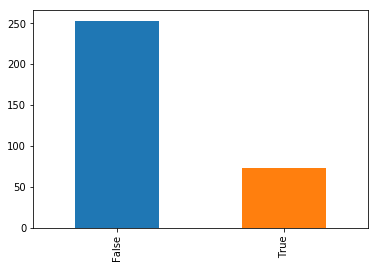

In [60]:
ktrans_df['ClinSig'].value_counts().plot(kind='bar')